# Downwelling transmittance Test

In [46]:
import numpy as np
from Py6S import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [47]:
# General settings
wavelength = 0.550
wind_speed = 30
wind_direction = 0
salinity = 34.3
pigmentation = 0.30

In [48]:
solar_azimuth = 0
solar_zeniths = np.arange(0, 90, 2)

def run_sixs(azimuth, zenith):
    # SixS Parameters
    s = SixS()
    s.wavelength = Wavelength(wavelength)
    s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
    s.ground_reflectance = GroundReflectance.HomogeneousOcean(wind_speed, wind_direction, salinity, pigmentation)

    # Set view parameters
    s.geometry = Geometry.User()
    s.geometry.solar_a = azimuth
    s.geometry.solar_z = zenith
    s.geometry.view_a = 180
    s.geometry.view_z = 45

    # Run the simulation
    s.run()
    water = s.outputs.values['water_component_water']

    return water

In [49]:
downwelling_transmittances = []
progress = tqdm(total=len(solar_zeniths))

for solar_zenith in solar_zeniths:
    water = run_sixs(solar_azimuth, solar_zenith)
    downwelling_transmittances.append(water)
    progress.update(1)
progress.close()


100%|██████████| 45/45 [00:09<00:00,  4.67it/s]


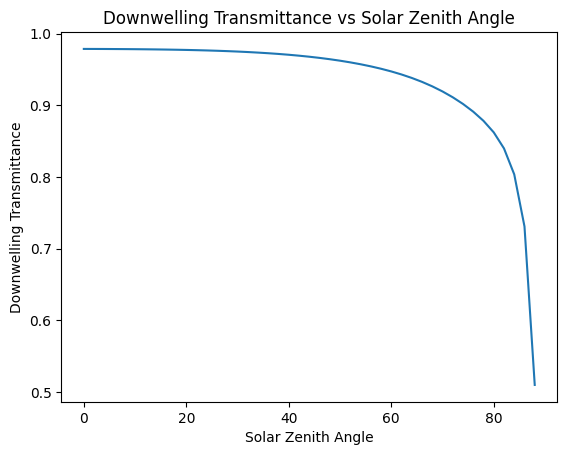

In [50]:
# Plot the downwelling transmittance 
plt.plot(solar_zeniths, downwelling_transmittances)
plt.xlabel('Solar Zenith Angle')
plt.ylabel('Downwelling Transmittance')
plt.title('Downwelling Transmittance vs Solar Zenith Angle')

plt.show()